# 1.1 Low-level features
Write a script that computes one of the low-level feature vector implemented in the
image_features.py file. Train a classifier and evaluate the test accuracy.

In [1]:
import numpy as np
import extract_features as ef

classes = ef.get_classes("../cake-classification/images/test")
X, Y = ef.process_directory("../cake-classification/images/test", classes)
print("test", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test-color_histogram.txt.gz", data)


X, Y = ef.process_directory("../cake-classification/images/train", classes)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train-color_histogram.txt.gz", data)


test (300, 192) (300,)
train (1500, 192) (1500,)


# 1.1 Train a classifier and evaluate the test accuracy.


<Axes: title={'center': 'Simple Classifier'}, xlabel='Epochs', ylabel='Accuracy'>

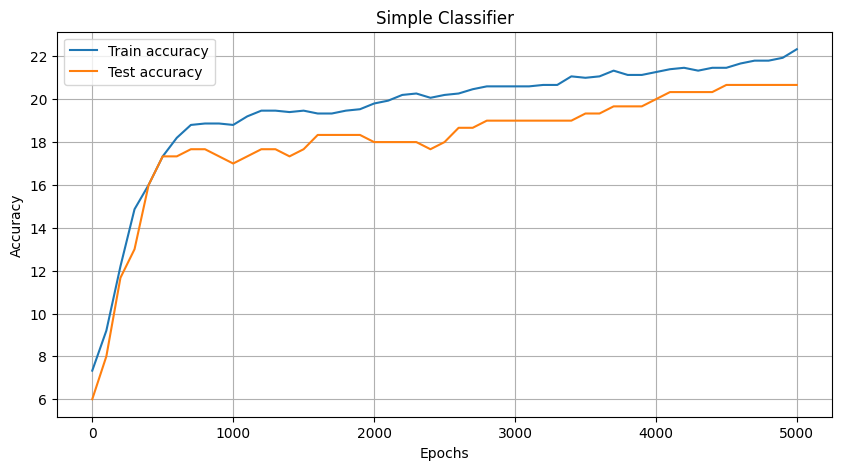

In [2]:
import train_classifier as tc
import numpy as np
import pandas as pd
train_accs, test_accs = tc.train_classifier(
    "../new_data/train-color_histogram.txt.gz", "../new_data/test-color_histogram.txt.gz")
epochs =np.arange(0, 5001, 100)
simple_classifier= pd.DataFrame({"Epochs": epochs, "Train accuracy": train_accs, "Test accuracy": test_accs})
simple_classifier.plot(x="Epochs", y=["Train accuracy", "Test accuracy"], grid=True, figsize=(10, 5),title="Simple Classifier",ylabel="Accuracy")

# 1.2 Neural features
Use the pretrained PVMLNet to extract as features the activations of the last hidden
layer. Train a perceptron without hidden layers and evaluate the test accuracy.

In [2]:
import numpy as np
import pvml
import extract_neural_features as enf
import extract_features as ef

classes = ef.get_classes("../cake-classification/images/test")
cnn = pvml.CNN.load("../models/pvmlnet.npz")

X, Y = enf.process_directory("../cake-classification/images/test", cnn,classes)
print("test", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test_last_hidden_layer.txt.gz", data)


X, Y = enf.process_directory("../cake-classification/images/train", cnn,classes)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train_last_hidden_layer.txt.gz", data)


test (300, 1000) (300,)
train (1500, 1000) (1500,)


<Axes: title={'center': 'Classifier Last Hidden Layer as Features'}, xlabel='Epochs', ylabel='Accuracy'>

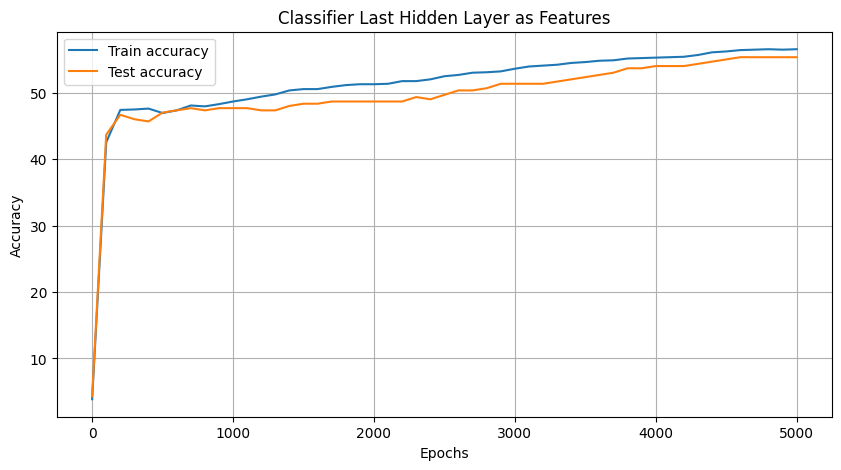

In [3]:
import train_classifier as tc
import numpy as np
import pandas as pd
train_accs, test_accs = tc.train_classifier(
    "../new_data/train_last_hidden_layer.txt.gz", "../new_data/test_last_hidden_layer.txt.gz", modelName="../models/cake-model-last-hidden-layer.npz")
epochs = np.arange(0, 5001, 100)
epochs
classifier_last_hidden_layer = pd.DataFrame(
    {"Epochs": epochs, "Train accuracy": train_accs, "Test accuracy": test_accs})
classifier_last_hidden_layer.plot(
    x="Epochs", y=["Train accuracy", "Test accuracy"], grid=True, figsize=(10, 5), title="Classifier Last Hidden Layer as Features",ylabel="Accuracy")


## 1.3 Transfer learning
Build a new network by replacing the last layer of PVMLNet with the weights of the
trained perceptron.


In [3]:
import numpy as np
import extract_features as ef
import inference as inf
import transfer_learning as tl


classes = ef.get_classes("../cake-classification/images/test")
X, Y = ef.get_images_as_features("../cake-classification/images/test", classes)

network_transferred = tl.transfer_learning(
    '../models/cake-model-last-hidden-layer.npz')

test_acc,predicted_lable,probability=inf.infer(network_transferred, classes, Y)

max prob:  [94.51247126067123, 99.9917657017611, 77.07151176435943, 99.99300494991039, 99.97866940438144, 86.51387669862788, 99.94078574572576, 99.87153162389582, 98.27190380966319, 72.1957635734271, 45.040583326151726, 99.99955154553628, 99.99990883762739, 54.52301120268248, 99.93390222406923, 99.63594186525778, 99.9891717666216, 87.79547074007496, 67.38282377629501, 99.41382110924764, 74.7839926686111, 66.33646216711026, 99.9998479782453, 99.99043339681624, 99.94152279663973, 88.87793158532027, 43.7166190086106, 99.48103803302675, 87.44640020116827, 49.39354451877131, 62.83860449059914, 71.25992312999088, 99.96204340059481, 99.9992143121487, 98.18431230293585, 96.06499977614513, 99.9908949059043, 86.38266542614184, 99.72992832349442, 99.80893001562963, 97.11405345102105, 99.52697198932391, 98.66407088683708, 95.72981456782766, 41.688777626070014, 47.37104656221166, 98.53385023416513, 58.24979701759428, 88.62486121686344, 66.35714501392103, 45.99068185129679, 98.85598202022625, 67.983

# 2.1 Combining features
Try different combinations of low-level features (concatenate two or more feature vectors
with np.concatenate).

In [ ]:
import numpy as np
import extract_features as ef
import image_features as imf

classes = ef.get_classes("../cake-classification/images/test")
# ---------------------------------------------
# Color Histogram
X, Y = ef.process_directory(
    "../cake-classification/images/test", classes)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test-color_histogram.txt.gz", data)


X, Y = ef.process_directory("../cake-classification/images/train", classes)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train-color_histogram.txt.gz", data)

# ---------------------------------------------
# Edge Direction Histogram
X, Y = ef.process_directory(
    "../cake-classification/images/test", classes, feature_elab=imf.edge_direction_histogram)

data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test-edge_direction_histogram.txt.gz", data)


X, Y = ef.process_directory("../cake-classification/images/train",
                            classes, feature_elab=imf.edge_direction_histogram)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train-edge_direction_histogram.txt.gz", data)

# ---------------------------------------------
# Co-occurrence Matrix 
X, Y = ef.process_directory(
    "../cake-classification/images/test", classes, feature_elab=imf.cooccurrence_matrix)


data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test-cooccurrence_matrix.txt.gz", data)


X, Y = ef.process_directory("../cake-classification/images/train",
                            classes, feature_elab=imf.cooccurrence_matrix)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train-cooccurrence_matrix.txt.gz", data)

# ---------------------------------------------
# RGB Co-occurrence Matrix rgb_cooccurrence_matrix
X, Y = ef.process_directory(
    "../cake-classification/images/test", classes, feature_elab=imf.rgb_cooccurrence_matrix)


data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/test-rgb_cooccurrence_matrix.txt.gz", data)


X, Y = ef.process_directory("../cake-classification/images/train",
                            classes, feature_elab=imf.rgb_cooccurrence_matrix)
print("train", X.shape, Y.shape)
data = np.concatenate([X, Y[:, None]], 1)
np.savetxt("../new_data/train-rgb_cooccurrence_matrix.txt.gz", data)


# Train a classifier for each kind of features 

In [ ]:
import train_classifier as tc
import numpy as np
import pandas as pd
accuracies = []
epoch = []
feature_type = []
# ----------------------------- FEATURES LOADING--------------------------------------------------
# Color Histogram & Edge Direction Histogram
data = np.loadtxt("../new_data/train-color_histogram.txt.gz")
X_train_color_histogram = data[:, :-1]
Y_train_color_histogram = data[:, -1].astype(int)

data = np.loadtxt("../new_data/test-color_histogram.txt.gz")
X_test_color_histogram = data[:, :-1]
Y_test_color_histogram = data[:, -1].astype(int)

# ---------------------------------------------
# Edge Direction Histogram
data = np.loadtxt("../new_data/train-edge_direction_histogram.txt.gz")
X_train_edge_direction_histogram = data[:, :-1]
Y_train_edge_direction_histogram = data[:, -1].astype(int)

data = np.loadtxt("../new_data/test-edge_direction_histogram.txt.gz")
X_test_edge_direction_histogram = data[:, :-1]
Y_test_edge_direction_histogram = data[:, -1].astype(int)

# ---------------------------------------------
# Co-occurrence Matrix
data = np.loadtxt("../new_data/train-cooccurrence_matrix.txt.gz")
X_train_cooccurrence_matrix = data[:, :-1]
Y_train_cooccurrence_matrix = data[:, -1].astype(int)

data = np.loadtxt("../new_data/test-cooccurrence_matrix.txt.gz")
X_test_cooccurrence_matrix = data[:, :-1]
Y_test_cooccurrence_matrix = data[:, -1].astype(int)

# ---------------------------------------------
# RGB Co-occurrence Matrix

data = np.loadtxt("../new_data/train-rgb_cooccurrence_matrix.txt.gz")
X_train_rgb_cooccurrence_matrix = data[:, :-1]
Y_train_rgb_cooccurrence_matrix = data[:, -1].astype(int)

data = np.loadtxt("../new_data/test-rgb_cooccurrence_matrix.txt.gz")
X_test_rgb_cooccurrence_matrix = data[:, :-1]
Y_test_rgb_cooccurrence_matrix = data[:, -1].astype(int)
# -------------------------------END FEATURES LOADING--------------------------------------------------

# # -------------------------------FEATURES TRAINING--------------------------------------------------
# # Color Histogram & Edge Direction Histogram
X_train_edge_direction_colour_histogram = np.concatenate(
    [X_train_color_histogram, X_train_edge_direction_histogram], axis=1)
X_test_edge_direction_colour_histogram = np.concatenate(
    [X_test_color_histogram, X_test_edge_direction_histogram], axis=1)
train_accs, test_accs = tc.train_classifier_v2(
    X_train_edge_direction_colour_histogram, Y_train_color_histogram, X_test_edge_direction_colour_histogram, Y_test_color_histogram)
epochs = np.arange(0, 5001, 100)
accuracies = accuracies + list(test_accs)
feature_type = feature_type + \
    ["Color Histogram & Edge Direction Histogram"]*len(epochs)
epoch = epoch+list(epochs)
# ---------------------------------------------
# RGB Co-occurrence Matrix & Co-occurrence Matrix
X_train_rgb_cooccurrence_matrix_cooccurrence_matrix = np.concatenate(
    [X_train_cooccurrence_matrix, X_train_rgb_cooccurrence_matrix], axis=1)

X_test_rgb_cooccurrence_matrix_colour_histogram = np.concatenate(
    [X_test_cooccurrence_matrix, X_test_rgb_cooccurrence_matrix], axis=1)

train_accs, test_accs = tc.train_classifier_v2(
    X_train_rgb_cooccurrence_matrix_cooccurrence_matrix, Y_train_cooccurrence_matrix, X_test_rgb_cooccurrence_matrix_colour_histogram, Y_test_cooccurrence_matrix)
epochs = np.arange(0, 5001, 100)
accuracies = accuracies + list(test_accs)
feature_type = feature_type + \
    ["RGB Co-occurrence Matrix & Co-occurrence Matrix"]*len(epochs)
epoch = epoch+list(epochs)
# ---------------------------------------------
# All features
X_train_All = np.concatenate(
    [X_train_color_histogram, X_train_rgb_cooccurrence_matrix, X_train_cooccurrence_matrix, X_train_edge_direction_histogram], axis=1)
X_test_all = np.concatenate(
    [X_test_color_histogram, X_test_rgb_cooccurrence_matrix, X_test_cooccurrence_matrix, X_test_edge_direction_histogram], axis=1)
train_accs, test_accs = tc.train_classifier_v2(
    X_train_All, Y_train_color_histogram, X_test_all, Y_test_color_histogram)
epochs = np.arange(0, 5001, 100)
accuracies = accuracies + list(test_accs)
feature_type = feature_type + \
    ["All features"]*len(epochs)
epoch = epoch+list(epochs)

# ---------------------------------------------
# Edge Direction Histogram & Color Histogram
X_train_edge_direction_color_histogram = np.concatenate(
    [X_train_color_histogram, X_train_edge_direction_histogram], axis=1)

X_test_edge_direction_colour_histogram = np.concatenate(
    [X_test_color_histogram, X_test_edge_direction_histogram], axis=1)

train_accs, test_accs = tc.train_classifier_v2(
    X_train_edge_direction_color_histogram, Y_train_color_histogram, X_test_edge_direction_colour_histogram, Y_test_color_histogram)
epochs = np.arange(0, 5001, 100)
accuracies = accuracies + list(test_accs)
feature_type = feature_type + \
    ["Edge Direction Histogram & Co-occurrence Matrix"]*len(epochs)
epoch = epoch+list(epochs)
result = pd.DataFrame(
    {"Epoch": epoch, "Feature type": feature_type, "Test accuracy": accuracies})
result.to_csv("../new_data/accuracy.csv", index=True)


<Axes: title={'center': 'Accuracy Comparison between Feature combinations'}, xlabel='Epoch', ylabel='Accuracy'>

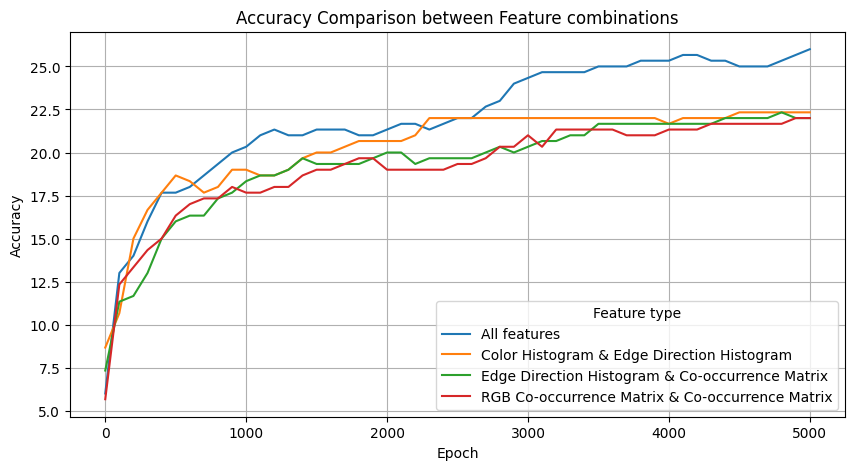

In [4]:
data=pd.read_csv("../new_data/accuracy.csv")
data=data.pivot(index='Epoch', columns='Feature type', values='Test accuracy')
data.plot(grid=True, figsize=(10, 5),title="Accuracy Comparison between Feature combinations",ylabel="Accuracy")

# 2.2 Analysis
Identify the pairs of classes that are more likely to be confused with neural features.
Also identify the test images that are misclassified even if the classifier predicted their
label with high confidence.


max prob:  [94.51247126067123, 99.9917657017611, 77.07151176435943, 99.99300494991039, 99.97866940438144, 86.51387669862788, 99.94078574572576, 99.87153162389582, 98.27190380966319, 72.1957635734271, 45.040583326151726, 99.99955154553628, 99.99990883762739, 54.52301120268248, 99.93390222406923, 99.63594186525778, 99.9891717666216, 87.79547074007496, 67.38282377629501, 99.41382110924764, 74.7839926686111, 66.33646216711026, 99.9998479782453, 99.99043339681624, 99.94152279663973, 88.87793158532027, 43.7166190086106, 99.48103803302675, 87.44640020116827, 49.39354451877131, 62.83860449059914, 71.25992312999088, 99.96204340059481, 99.9992143121487, 98.18431230293585, 96.06499977614513, 99.9908949059043, 86.38266542614184, 99.72992832349442, 99.80893001562963, 97.11405345102105, 99.52697198932391, 98.66407088683708, 95.72981456782766, 41.688777626070014, 47.37104656221166, 98.53385023416513, 58.24979701759428, 88.62486121686344, 66.35714501392103, 45.99068185129679, 98.85598202022625, 67.983

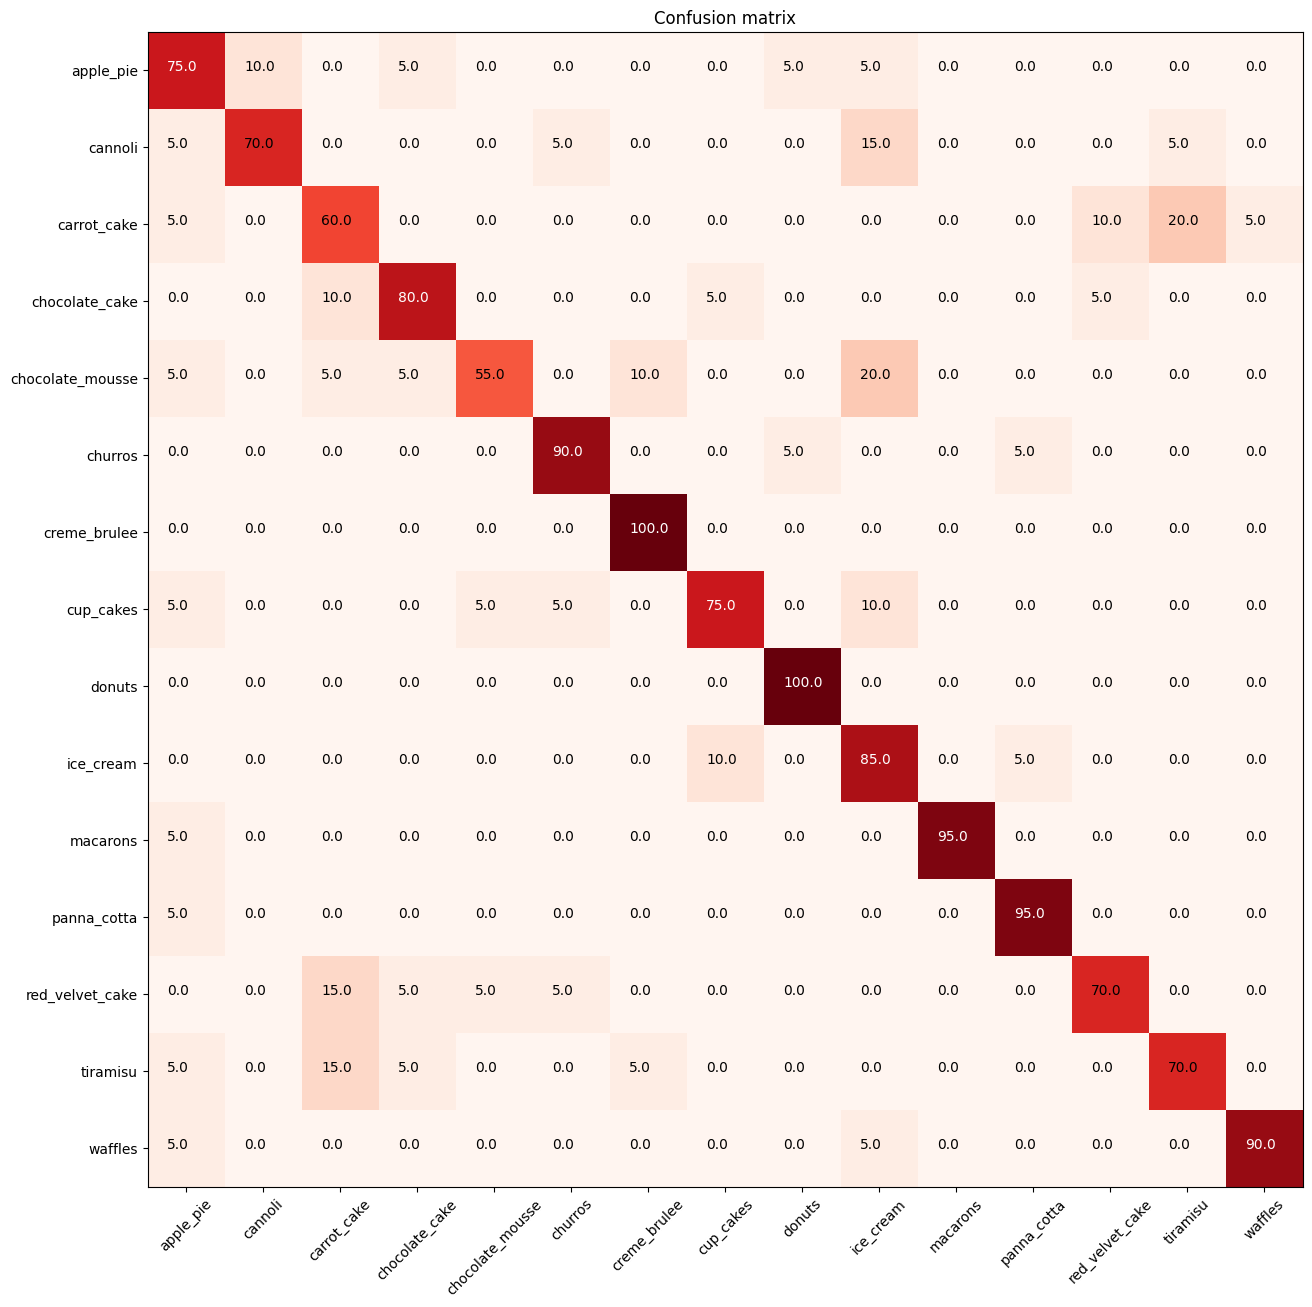

In [2]:
import analysis as an
import pvml
import extract_features as ef
import inference as inf
import transfer_learning as tl


network=pvml.MLP.load("../models/cake-model-last-hidden-layer.npz")

classes = ef.get_classes("../cake-classification/images/test")
X, Y = ef.get_images_as_features("../cake-classification/images/test", classes)

network_transferred = tl.transfer_learning(
    '../models/cake-model-last-hidden-layer.npz')

test_acc,predicted_label,probabilities=inf.infer(network_transferred, classes, Y)


an.show_confusion_matrix(Y, predicted_label, classes)

Text(0.5, 1.0, 'Ice cream')

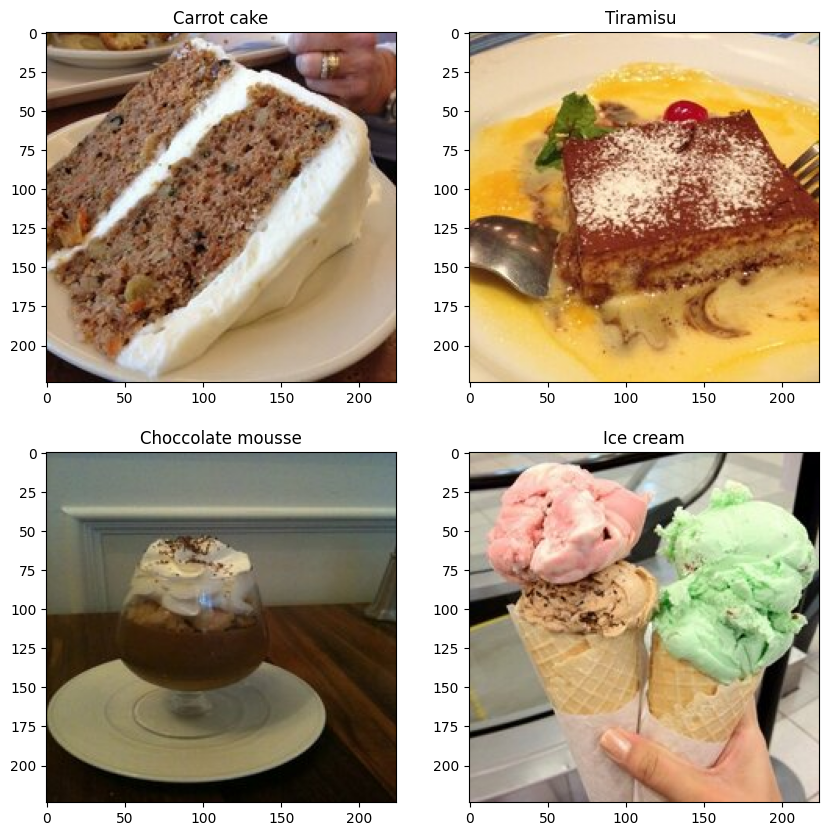

In [3]:
import numpy as np
import matplotlib.pyplot as plt

example_carrot_index = np.where(Y == 2)[0][0]
example_carrot = X[example_carrot_index]

example_tiramisu_index = np.where(Y == 13)[0][0]
example_tiramisu = X[example_tiramisu_index]

example_choccolate_mousse_index = np.where(Y == 4)[0][0]
example_choccolate_mousse = X[example_choccolate_mousse_index]

example_ice_cream_index = np.where(Y == 9)[0][0]
example_ice_cream = X[example_ice_cream_index]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(example_carrot.reshape(224, 224, 3))
axs[0, 0].set_title("Carrot cake")
axs[0, 1].imshow(example_tiramisu.reshape(224, 224, 3))
axs[0, 1].set_title("Tiramisu ")
axs[1, 0].imshow(example_choccolate_mousse.reshape(224, 224, 3))
axs[1, 0].set_title("Choccolate mousse")
axs[1, 1].imshow(example_ice_cream.reshape(224, 224, 3))
axs[1, 1].set_title("Ice cream")



In [9]:
import os
import pandas as pd
import numpy as np
probabilities = np.array(probabilities)
misclassified_index = np.where(predicted_label != Y)
# class_correct = Y_test[misclassified_index]
class_correct = (misclassified_index[:][0] // 20) % 20
class_wrong = predicted_label[misclassified_index]
probabilities_misclassified = probabilities[misclassified_index]
in_class_pos = misclassified_index - class_correct*20
class_names_correct = [classes[i] for i in class_correct]
class_names_wrong = [classes[i] for i in class_wrong]

# #create an array of two rows. The first contains the class names, the second the positions of the images misclassified in the class
misclassified_info = pd.DataFrame(
    {'Correct class': class_names_correct, 'Position': in_class_pos[0], 'Wrong class': class_names_wrong, 'Probability': probabilities_misclassified})
misclassified_info.to_csv("../new_data/misclassified_info.csv", index=True)

<Axes: title={'center': 'Misclassified cakes'}, xlabel='Correct class', ylabel='Wrong class'>

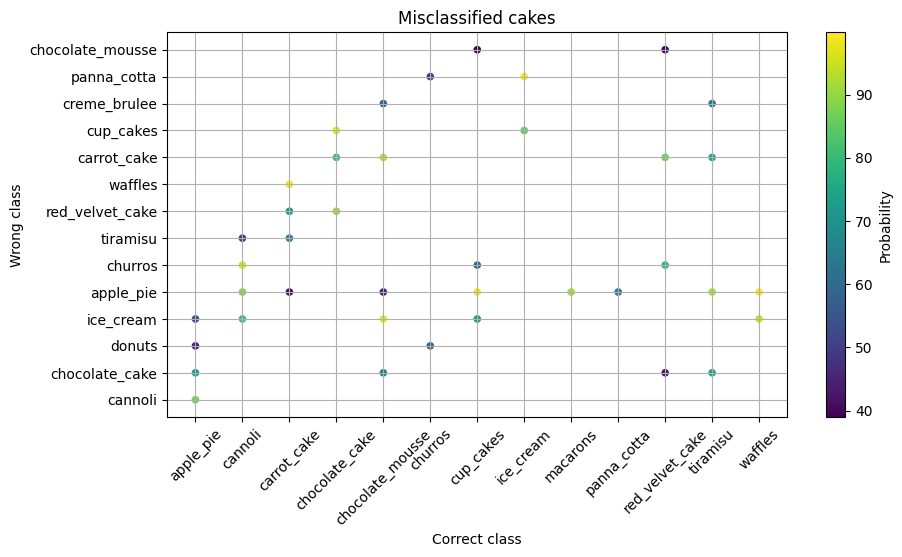

In [16]:
import pandas as pd

result = pd.read_csv("../new_data/misclassified_info.csv")
result = result.groupby(['Correct class', 'Wrong class']).mean()
result.reset_index(inplace=True)
result.plot(kind='scatter', x='Correct class', y='Wrong class', grid=True, figsize=(10, 5), title="Misclassified cakes",
            ylabel="Wrong class", xlabel="Correct class", c='Probability', rot=45, colormap='viridis')

# 2.3 Neural features
Try to use neural features computed by different hidden layers. When the activations
are spatially distributed, you may reduce them to a single feature vector by averaging
over the spatial dimensions.

In [ ]:
import numpy as np
import pvml
import extract_neural_features as enf
import extract_features as ef

network=pvml.CNN.load("../models/pvmlnet.npz")
classes = ef.get_classes("../cake-classification/images/test")

for level in range(-1,-5,-1):
    X, Y = enf.process_directory("../cake-classification/images/test", network,classes,activation_layer=level)
    print("test", X.shape, Y.shape)
    data = np.concatenate([X, Y[:, None]], 1)
    np.savetxt("../new_data/test_last_hidden_layer_"+str(level)+".txt.gz", data)


    X, Y = enf.process_directory("../cake-classification/images/train", network,classes,activation_layer=level)
    print("train", X.shape, Y.shape)
    data = np.concatenate([X, Y[:, None]], 1)
    np.savetxt("../new_data/train_last_hidden_layer_"+str(level)+".txt.gz", data)
    

In [ ]:
import numpy as np
import pandas as pd
import train_classifier as tc

accuracies = []
epoch = []
feature_level = []
for level in range(-1, -5, -1):
    data = np.loadtxt(
        "../new_data/train_last_hidden_layer_"+str(level)+".txt.gz")
    X_train = data[:, :-1]
    Y_train = data[:, -1].astype(int)

    data = np.loadtxt("../new_data/test_last_hidden_layer_" +
                      str(level)+".txt.gz")
    X_test = data[:, :-1]
    Y_test = data[:, -1].astype(int)
    train_accs, test_accs = tc.train_classifier_v2(
        X_train, Y_train, X_test, Y_test, modelName="../models/cake-model-layer-"+str(level)+".npz")
    epochs = np.arange(0, 5001, 100)
    accuracies = accuracies + list(test_accs)
    feature_level = feature_level + \
        ["Level "+str(level)]*len(epochs)
    epoch = epoch+list(epochs)

result = pd.DataFrame(
    {"Epoch": epoch, "Feature level": feature_level, "Test accuracy": accuracies})
result.to_csv("../new_data/accuracy_layers.csv", index=True)

<Axes: title={'center': 'Accuracy Comparison between Feature levels'}, xlabel='Epoch', ylabel='Accuracy'>

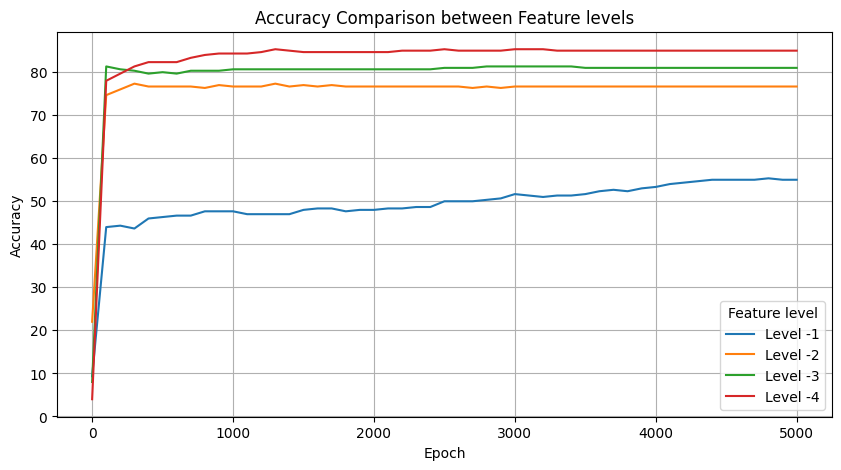

In [ ]:
import pandas as pd

data=pd.read_csv("../new_data/accuracy_layers.csv")
data=data.pivot(index='Epoch', columns='Feature level', values='Test accuracy')
data.plot( grid=True, figsize=(10, 5),title="Accuracy Comparison between Feature levels",ylabel="Accuracy")